# Setup

In [1]:
import datetime
import numpy as np
from numpy import nan
from pprint import pprint
import matplotlib.pyplot as plt
import tldextract
import csv
import os
from pprint import pprint

# Temp

In [2]:
ts = 1548670956
date = datetime.datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d %H:%m')
print(date)
date = "2019-01-31"
print(date >= "2019-01-31")
print(date >= "2019-02-01")
print(date <= "2019-01-31")

2019-01-28 10:01
True
False
True


# Read data

In [2]:
def getSecondLevelDomain(phish):
    res = None
    ext = tldextract.extract(phish)
    if ext and ext.domain and ext.suffix:
        res = '.'.join([ext.domain, ext.suffix])
        
    return res

In [3]:
def getSubdomainDomain(phish):
    res = None
    ext = tldextract.extract(phish)
    if ext and ext.subdomain:
        res = ext.subdomain
        
    return res

In [4]:
folders = ["../groundtruth_data/ecrimex/phish_conf90/", "../groundtruth_data/ecrimex/phish_conf100/"]
folder = "../groundtruth_data/ecrimex/phish/"

phish_domains = dict()
for folder in folders:
    for file in os.listdir(folder):
        file = os.path.join(folder, file)
        with open(file, "r", encoding='utf-8') as fin:
            content = eval(fin.read())
            for phish in content:
                host = phish['domain']
                confidence = phish['confidence_level']
                domain = getSecondLevelDomain(host)
                subdomain = getSubdomainDomain(host)

                if domain:
                    date = datetime.datetime.utcfromtimestamp(phish['date_discovered']).strftime('%Y-%m-%d')
                    
                    # sept - oct
                    if date >= '2018-09-01' and date <= '2018-10-31':
                        if domain not in phish_domains:
                            phish_domains[domain] = dict()
                            phish_domains[domain]['dates'] = set()
                            phish_domains[domain]['asns'] = set()
                            phish_domains[domain]['host'] = set()
                            phish_domains[domain]['confidence'] = 0
                            phish_domains[domain]['source'] = 'apwg'

                        phish_domains[domain]['dates'].add(date)
                        phish_domains[domain]['asns'] = phish_domains[domain]['asns'].union(set(phish['asn']))
                        if confidence > phish_domains[domain]['confidence']:
                            phish_domains[domain]['confidence'] = confidence
                        phish_domains[domain]['host'].add(host)
            
len(phish_domains)

53183

In [5]:
folders = ["../groundtruth_data/ecrimex/phish_conf90/", "../groundtruth_data/ecrimex/phish_conf100/"]
folder = "../groundtruth_data/ecrimex/phish/"

phish_domains_future = dict()
for folder in folders:
    for file in os.listdir(folder):
        file = os.path.join(folder, file)
        with open(file, "r", encoding='utf-8') as fin:
            content = eval(fin.read())
            for phish in content:
                host = phish['domain']
                confidence = phish['confidence_level']
                domain = getSecondLevelDomain(host)
                subdomain = getSubdomainDomain(host)

                if domain:
                    date = datetime.datetime.utcfromtimestamp(phish['date_discovered']).strftime('%Y-%m-%d')
                    
                    # sept - oct
                    if date >= '2018-11-01' and date <= '2018-12-31':
                        if domain not in phish_domains_future:
                            phish_domains_future[domain] = dict()
                            phish_domains_future[domain]['dates'] = set()
                            phish_domains_future[domain]['asns'] = set()
                            phish_domains_future[domain]['host'] = set()
                            phish_domains_future[domain]['confidence'] = 0
                            phish_domains_future[domain]['source'] = 'apwg'

                        phish_domains_future[domain]['dates'].add(date)
                        phish_domains_future[domain]['asns'] = phish_domains_future[domain]['asns'].union(set(phish['asn']))
                        if confidence > phish_domains_future[domain]['confidence']:
                            phish_domains_future[domain]['confidence'] = confidence
                        phish_domains_future[domain]['host'].add(host)
            
len(phish_domains_future)

35356

In [6]:
folder = "../groundtruth_data/ecrimex/mal_domain/"

mal_domains = set()
for file in os.listdir(folder):
    file = os.path.join(folder, file)
    with open(file, "r", encoding='utf-8') as fin:
        content = eval(fin.read())
        for phish in content:
            host = phish['domain']
            domain = getSecondLevelDomain(host)
            
            mal_domains.add(domain)
            
len(mal_domains)

25585

# ASN analysis

In [15]:
# list of phish asn to domain
asn_to_domain = dict()

for phish, vals in phish_domains.items():
    asns = vals['asns']
    for asn in asns:
        if asn not in asn_to_domain:
            asn_to_domain[asn] = set()
        asn_to_domain[asn].add(phish)

len(asn_to_domain)

1632

In [18]:
# list of hosting provider to asn
fnin = "../features/hostingService/hosting_providers_to_asn"

with open(fnin, 'r', encoding="utf-8") as fin:
    domain_to_asn = eval(fin.read())

hosting_provider_asn = set([asn for host, asn in domain_to_asn.items()])

len(hosting_provider_asn)

277

In [23]:
# intersection of phish asn and hosting provider asn
phish_asn = set(asn_to_domain.keys())

asn_phish_host = phish_asn.intersection(hosting_provider_asn)

len(asn_phish_host)

0

In [25]:
# get phish domains of asn intersection
asn_phish_host_domains = set()
for asn in asn_phish_host:
    asn_phish_host_domains = asn_phish_host_domains.union(asn_to_domain[asn])
    
len(asn_phish_host_domains)

0

In [44]:
print(phish_domains['3utilities.com'])

{'dates': {'2018-12-12', '2018-12-10', '2018-08-16', '2018-10-02', '2018-12-22', '2018-06-27', '2018-07-21', '2018-08-21', '2018-07-11', '2018-08-05', '2018-11-14', '2018-08-22', '2018-12-25', '2018-11-07', '2018-11-03', '2018-12-07', '2018-12-05', '2018-10-20', '2018-08-02', '2018-12-08', '2018-08-26', '2018-07-05', '2018-09-19', '2018-09-17', '2018-07-12', '2018-11-20', '2018-08-01', '2018-08-13', '2018-09-27', '2018-11-04', '2018-12-13', '2018-09-30', '2018-07-26', '2018-11-18', '2018-09-08', '2018-09-05', '2018-12-24', '2018-07-08', '2018-07-28', '2018-10-03', '2018-11-23', '2018-10-07', '2018-08-17', '2018-09-16', '2018-12-21', '2018-12-03', '2018-12-02', '2018-12-26', '2018-06-19', '2018-08-18', '2018-06-29', '2018-10-12', '2018-11-25', '2018-11-29', '2018-10-06', '2018-12-01', '2018-08-24', '2018-11-27', '2018-09-12', '2018-08-28', '2018-08-20', '2018-08-19', '2018-08-23', '2018-10-10', '2018-11-17', '2018-11-24', '2018-08-11', '2018-07-13', '2018-09-23', '2018-12-27', '2018-11-

In [45]:
mal_phish_domains = mal_domains.intersection(set(phish_domains.keys()))

mal_phish_domains_asns = set()
for d in mal_phish_domains:
    if len(phish_domains[d]['asns']) > 0 or (0 in phish_domains[d]['asns'] and len(phish_domains[d]['asns']) > 1):
        mal_phish_domains_asns.add(d)
        
print(len(mal_phish_domains_asns))

2512


# Phish and mal intersection

In [7]:
phish_mal_domain = set(phish_domains.keys()).intersection(mal_domains)
len(phish_mal_domain)

498

In [8]:
phish_mal_domain_future = set(phish_domains_future.keys()).intersection(mal_domains)
len(phish_mal_domain_future)

335

# Timespan analysis

In [11]:
mal_domains_info = {key: val for key, val in phish_domains.items() if key in phish_mal_domain}
len(mal_domains_info)
#mal_domains_info['serveirc.com']

498

In [14]:
mal_domains_info_future = {key: val for key, val in phish_domains_future.items() if key in phish_mal_domain_future}
len(mal_domains_info_future)
#mal_domains_info['serveirc.com']

335

In [31]:
quarter = {"01": 'Q1', "02": 'Q1',"03": 'Q1', "04": 'Q2', "05": 'Q2', "06": 'Q2', "07": 'Q3', "08": 'Q3', "09": 'Q3', "10": 'Q4', "11": 'Q4', "12": 'Q4'}
def processList(phish_list):
    data = dict()

    for phish in phish_list:
        domain = phish[0]
        timestamp = phish[1]
        
        # get year, month
        yr, mn = timestamp.split('-')[:2]
        
        # get month, quarter
        yr_qu = '-'.join([yr, quarter[mn]])
        
        # get year-month
        yr_mn = '-'.join(timestamp.split('-')[:2])
        
        if domain not in data:
            data[domain] = dict()
            data[domain]['months'] = set()
            data[domain]['quarters'] = set()
            data[domain]['years'] = set()
        data[domain]['months'].add(yr_mn)
        data[domain]['quarters'].add(yr_qu)
        data[domain]['years'].add(yr)

    return data

In [36]:
mal_domains_list = []

for domain, vals in mal_domains_info.items():
    for date in vals['dates']:
        mal_domains_list.append([domain, date])

print(len(mal_domains_list))

4031


In [37]:
phish_domains_list = []

for domain, vals in phish_domains.items():
    for date in vals['dates']:
        phish_domains_list.append([domain, date])

print(len(phish_domains_list))

128868


In [54]:
def getBins(domains_list, domains):
    domain_timestamp = processList(domains_list)
    len(domain_timestamp)
    
    monthly_bins = dict()
    quarterly_bins = dict()
    yearly_bins = dict()

    for domain, vals in domains.items():
        target=0
        # get timestamp
        keys = ['months', 'quarters', 'years']
        bins = [monthly_bins, quarterly_bins, yearly_bins]

        for i, key in enumerate(keys):
            bn = bins[i]
            times = domain_timestamp[domain][key]
            for time in times:
                if time not in bn:
                    bn[time] = [0,0]
                bn[time][target] += 1
                
    pprint(monthly_bins)
    pprint(quarterly_bins)
    pprint(yearly_bins)
    
    return monthly_bins, quarterly_bins, yearly_bins

In [44]:
def domainClassifPerc(timebin, title, ylabel, bin_type="", fraction=True):
    plt.figure(figsize=(8, 5))
    
    #############################################################################33
    plt.subplot(1, 1, 1)
    
    # comp, mal
    mal_comp = []
    time = sorted(timebin.keys())
    #time = time[:-1]

    N = len(time)
    for t in time:
        mal_comp.append(timebin[t])
    
    if fraction:
        mal = [x[0]/(x[0]+x[1]) for x in mal_comp]
        comp = [x[1]/(x[0]+x[1]) for x in mal_comp]
    else:
        mal = [x[0] for x in mal_comp]
        comp = [x[1] for x in mal_comp]
        
    print(time)
    print(mal)
    print(comp)

    ind = np.arange(N)    # the x locations for the groups
    width = 0.7       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, comp, width)
    p2 = plt.bar(ind, mal, width,
                 bottom=comp)
    
    #print(p1[0])
    
    plt.ylabel(ylabel)
    plt.xticks(ind, time, rotation=50)
    plt.legend((p1[0], p2[0]), ('Compromised', 'Malicious'))
    
    plt.tight_layout()
    plt.show()

#### Phish

In [56]:
monthly_bins, quarterly_bins, yearly_bins = getBins(phish_domains_list, phish_domains)

{'2018-05': [5686, 0],
 '2018-06': [14994, 0],
 '2018-07': [14891, 0],
 '2018-08': [12729, 0],
 '2018-09': [12657, 0],
 '2018-10': [14671, 0],
 '2018-11': [13563, 0],
 '2018-12': [11796, 0]}
{'2018-Q2': [19910, 0], '2018-Q3': [38644, 0], '2018-Q4': [38801, 0]}
{'2018': [94249, 0]}


['2018']
[94249]
[0]


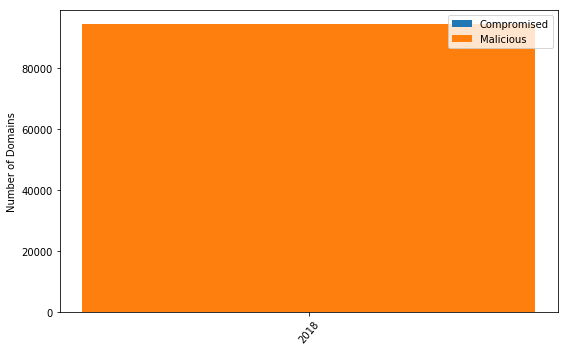

In [57]:
domainClassifPerc(yearly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)

['2018-Q2', '2018-Q3', '2018-Q4']
[19910, 38644, 38801]
[0, 0, 0]


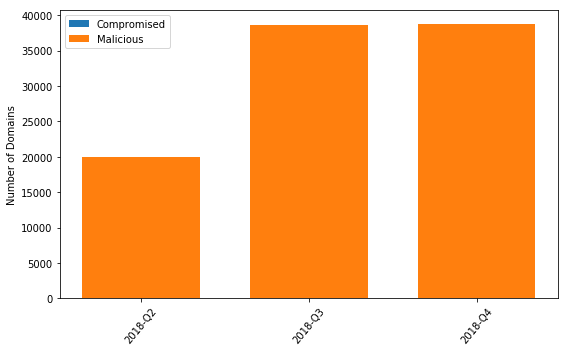

In [46]:
domainClassifPerc(quarterly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)

['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12']
[5686, 14994, 14891, 12729, 12657, 14671, 13563, 11796]
[0, 0, 0, 0, 0, 0, 0, 0]


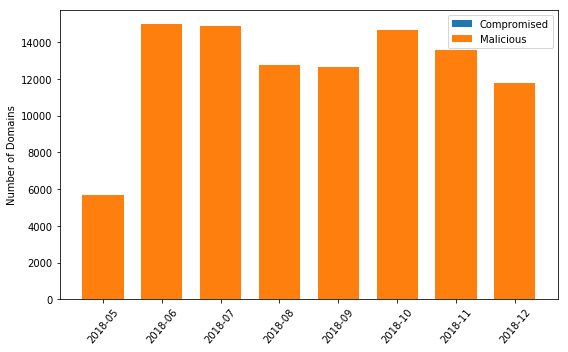

In [47]:
domainClassifPerc(monthly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)

#### Malicious intersection on phish (phish time)

In [58]:
monthly_bins, quarterly_bins, yearly_bins = getBins(mal_domains_list, mal_domains_info)

{'2018-05': [151, 0],
 '2018-06': [349, 0],
 '2018-07': [685, 0],
 '2018-08': [681, 0],
 '2018-09': [282, 0],
 '2018-10': [236, 0],
 '2018-11': [191, 0],
 '2018-12': [158, 0]}
{'2018-Q2': [481, 0], '2018-Q3': [1597, 0], '2018-Q4': [550, 0]}
{'2018': [2518, 0]}


['2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12']
[151, 349, 685, 681, 282, 236, 191, 158]
[0, 0, 0, 0, 0, 0, 0, 0]


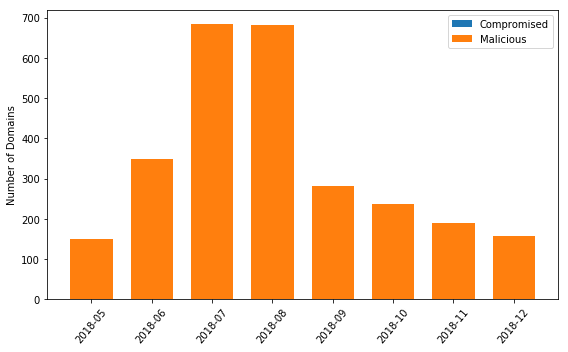

In [59]:
domainClassifPerc(monthly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)

#### Malicious intersection on phish (malicious time)

['2018', '2019']
[2473, 36]
[0, 0]


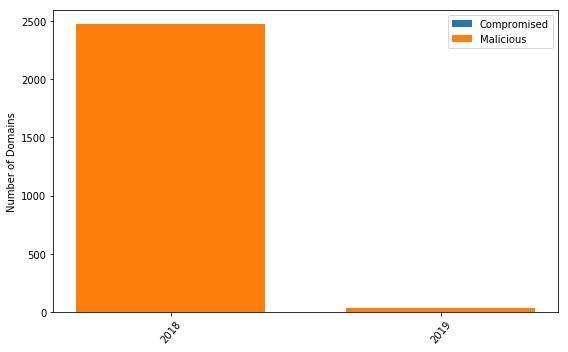

In [92]:
domainClassifPerc(yearly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)

['2018-Q1', '2018-Q2', '2018-Q3', '2018-Q4', '2019-Q1']
[68, 1634, 552, 255, 36]
[0, 0, 0, 0, 0]


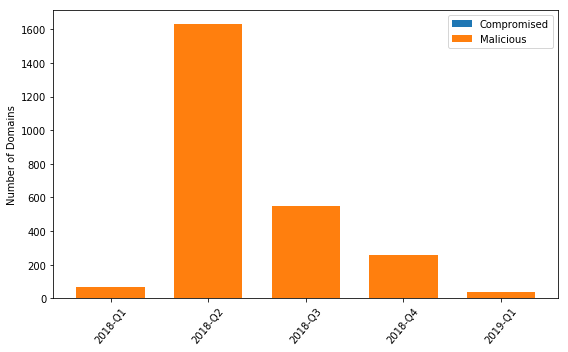

In [93]:
domainClassifPerc(quarterly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)

['2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-11', '2018-12', '2019-01', '2019-02']
[14, 56, 150, 775, 715, 417, 135, 200, 55, 35, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


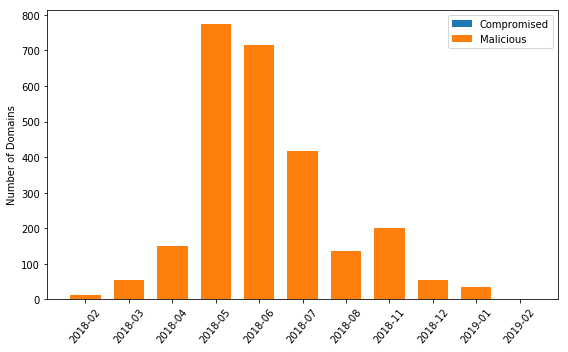

In [94]:
domainClassifPerc(monthly_bins, 'Yearly Domain Classification', 'Number of Domains', fraction=False)

# Classification analysis

In [73]:
classification = dict()

for domain, vals in mal_domains.items():
    classifs = vals['classification']
    for clif in classifs:
        if clif not in classification:
            classification[clif] = 0
        classification[clif] += 1

print(classification)

{'Fake Store': 20765, 'malicious': 23, 'storefront': 6789, '': 669}


# Confidence analysis

In [13]:
confidence = dict()

for domain, vals in mal_domains_info.items():
    conf = vals['confidence']
    #for conf in confs:
    if conf not in confidence:
        confidence[conf] = 0
    confidence[conf] += 1

print(confidence)

{100: 2518, 90: 11}


# Subdomain analysis

In [69]:
subdomain_list = []

for domain, vals in mal_domains.items():
    subdomains = vals['subdomain']
    if len(subdomains) > 1:
        md = dict()
        md[domain] = vals
        subdomain_list.append(md)

print(len(subdomain_list))

18


In [71]:
pprint(subdomain_list)

[{'adtrackr.info': {'confidence': {100},
                    'discovered': {'2018-03-20', '2018-03-24'},
                    'subdomain': {'itema.adtrackr.info',
                                  'itemb.adtrackr.info',
                                  'itemc.adtrackr.info',
                                  'iteme.adtrackr.info',
                                  'itemh.adtrackr.info',
                                  'itemi.adtrackr.info',
                                  'itemyi.adtrackr.info',
                                  'itemzd.adtrackr.info'}}},
 {'blogspot.com': {'confidence': {100},
                   'discovered': {'2019-01-28'},
                   'subdomain': {'adresscontentsimplyviews0.blogspot.com',
                                 'adresscontentsimplyviews1.blogspot.com',
                                 'adresscontentsimplyviews2.blogspot.com',
                                 'adresscontentsimplyviews3.blogspot.com',
                                 'adressconte

# Timespan range

In [36]:
print(len(domain_target))
print(len([d for d, t in domain_target.items() if t["target"] ==-1]))
print(len([d for d, t in domain_target.items() if t["target"] ==0]))
#print(len([d for d in domain_target if d[1]==-1]))

498
498
0


# TLD groupings

In [ ]:
# 2 months prior
# features using time: tld, domain edit distance
# month 9-10 use tld and domain edit distance
# month 11-12 use same tld and domain edit distance?, use 9-10 tld and domain edit distance

In [40]:
mal_domains_1 = set()
mal_domains_2 = set()
mal_domains_3 = set()

for domain, vals in mal_domains.items():
    for date in vals:
        #print(date)
        if date >= "2018-07-01" and date <= "2018-08-31":
            mal_domains_1.add(domain)
        
        elif date >= "2018-09-01" and date <= "2018-10-31":
            mal_domains_2.add(domain)
        
        elif date >= "2018-11-01" and date <= "2018-12-31":
            mal_domains_3.add(domain)

print(len(mal_domains_1))
print(len(mal_domains_2))
print(len(mal_domains_3))

1341
491
326


In [42]:
print(len(mal_domains_1.intersection(mal_domains_2)))
print(len(mal_domains_2.intersection(mal_domains_3)))

36
19


In [43]:
def getTlds(m_d):
    tlds = dict()
    for domain in m_d:
        ext = tldextract.extract(domain)
        tld = ext.suffix
        if tld:
            if tld not in tlds:
                tlds[tld] = 0
            tlds[tld] += 1
    print(len(tlds))
    print(tlds)
    total = sum([val for key, val in tlds.items()])
    tlds = sorted([[val/total, key] for key, val in tlds.items()])
    print(tlds)

In [44]:
getTlds(mal_domains_1)

28
{'men': 391, 'top': 473, 'bid': 185, 'cf': 29, 'space': 15, 'ml': 31, 'club': 4, 'trade': 31, 'net': 4, 'com': 20, 'site': 22, 'date': 19, 'tk': 3, 'today': 1, 'ga': 33, 'gq': 17, 'win': 22, 'fun': 5, 'loan': 4, 'xyz': 16, 'online': 8, 'org': 1, 'pw': 2, 'life': 1, 'be': 1, 'edu.mx': 1, 'me': 1, 'store': 1}
[[0.0007457121551081282, 'be'], [0.0007457121551081282, 'edu.mx'], [0.0007457121551081282, 'life'], [0.0007457121551081282, 'me'], [0.0007457121551081282, 'org'], [0.0007457121551081282, 'store'], [0.0007457121551081282, 'today'], [0.0014914243102162564, 'pw'], [0.0022371364653243847, 'tk'], [0.002982848620432513, 'club'], [0.002982848620432513, 'loan'], [0.002982848620432513, 'net'], [0.0037285607755406414, 'fun'], [0.005965697240865026, 'online'], [0.011185682326621925, 'space'], [0.011931394481730051, 'xyz'], [0.01267710663683818, 'gq'], [0.014168530947054437, 'date'], [0.014914243102162566, 'com'], [0.01640566741237882, 'site'], [0.01640566741237882, 'win'], [0.02162565249813

In [45]:
getTlds(mal_domains_2)

24
{'men': 50, 'date': 11, 'top': 253, 'bid': 27, 'ml': 23, 'cf': 11, 'site': 15, 'tk': 8, 'gq': 16, 'net': 4, 'pw': 7, 'xyz': 6, 'com': 14, 'ga': 12, 'store': 1, 'win': 5, 'club': 4, 'trade': 5, 'space': 5, 'org': 1, 'fun': 5, 'online': 5, 'website': 2, 'edu.mx': 1}
[[0.002036659877800407, 'edu.mx'], [0.002036659877800407, 'org'], [0.002036659877800407, 'store'], [0.004073319755600814, 'website'], [0.008146639511201629, 'club'], [0.008146639511201629, 'net'], [0.010183299389002037, 'fun'], [0.010183299389002037, 'online'], [0.010183299389002037, 'space'], [0.010183299389002037, 'trade'], [0.010183299389002037, 'win'], [0.012219959266802444, 'xyz'], [0.014256619144602852, 'pw'], [0.016293279022403257, 'tk'], [0.02240325865580448, 'cf'], [0.02240325865580448, 'date'], [0.024439918533604887, 'ga'], [0.028513238289205704, 'com'], [0.03054989816700611, 'site'], [0.032586558044806514, 'gq'], [0.04684317718940937, 'ml'], [0.054989816700611, 'bid'], [0.10183299389002037, 'men'], [0.5152749490

In [46]:
getTlds(mal_domains_3)

27
{'space': 7, 'top': 119, 'bid': 14, 'xyz': 55, 'com': 19, 'men': 25, 'pw': 6, 'club': 5, 'ink': 3, 'ga': 1, 'edu.mx': 1, 'trade': 7, 'date': 6, 'net': 4, 'ml': 8, 'gq': 5, 'online': 8, 'site': 9, 'life': 6, 'website': 2, 'cf': 6, 'tk': 2, 'today': 4, 'info': 1, 'us': 1, 'fun': 1, 'org': 1}
[[0.003067484662576687, 'edu.mx'], [0.003067484662576687, 'fun'], [0.003067484662576687, 'ga'], [0.003067484662576687, 'info'], [0.003067484662576687, 'org'], [0.003067484662576687, 'us'], [0.006134969325153374, 'tk'], [0.006134969325153374, 'website'], [0.009202453987730062, 'ink'], [0.012269938650306749, 'net'], [0.012269938650306749, 'today'], [0.015337423312883436, 'club'], [0.015337423312883436, 'gq'], [0.018404907975460124, 'cf'], [0.018404907975460124, 'date'], [0.018404907975460124, 'life'], [0.018404907975460124, 'pw'], [0.02147239263803681, 'space'], [0.02147239263803681, 'trade'], [0.024539877300613498, 'ml'], [0.024539877300613498, 'online'], [0.027607361963190184, 'site'], [0.04294478

# Domain edit distance

In [49]:
def getDomains(m_d):
    domains = set()
    for dm in m_d:
        ext = tldextract.extract(dm)
        domain = ext.domain
        if domain:
            domains.add(domain)
    print(len(domains))
    print(domains)

In [51]:
print(len(mal_domains_1))
getDomains(mal_domains_1)

1341
1317
{'high-spirit', 'salegymnasticst', 'wrbfretcnorp', 'ideasryber', 'kimonoshop', 'scarfshop', 'cheap-bikewebshop', 'fishingbuye', 'guarantjab', 'goodmotorcyclestore', 'salestorely', 'salebuildinge', 'unitedstatescenter', 'cheapmotorcyclemarket', 'pisashop', 'softtjxzjz', 'trendyajdr', 'gkvtetnedh', 'phbslmalls', 'new-fhdjzs', 'hotsmotorcycleonline', 'verytoyfactory', 'very-cyclewebmall', 'medicalcares', 'cheap-bikeweboutlet', 'cheap-tyrewebonline', 'goodcaraccessorieswebmall', 'yahooonline', 'carssupplies', 'viplawn-mowerfactory', 'medicalbuy', 'best-bikeweboutlet', 'bestcamerawebonline', 'homemark', 'discountshop', 'salehatbeltr', 'camerasky', 'broadbandposition', 'furnitureput', 'imaginjawc', 'hanako-inc', 'gomotorcycleoutlet', 'racekmalls', 'pscentero', 'special-cycleweboutlet', 'flyautomobile', 'personalpcsr', 'best-tireswebshop', 'culturefgj', 'jewelrybuys', 'wholesaleja', 'computershop', 'diyrebate', 'networksmember', 'beltglasses', 'barsthecare', 'verysalestyre-store', '

# Train Data (Sept-Oct 2018)

- mal domains: apwg
- comp domains: phishlabs

In [26]:
# train and test and predict domain to target
domain_target = dict()

### Mal domains apwg (Sept-Oct 2018)

In [27]:
for domain, val in mal_domains_info.items():
    dates = val['dates']
    for date in dates:
        if date >= '2018-09-01' and date <= '2018-10-31':
            domain_target[domain] = val
            domain_target[domain]["target"] = -1
            domain_target[domain]["dataset"] = "mal-apwg"
            break

print("total:", len(domain_target))
print("unknown:", len([x for x, val in domain_target.items() if val["target"] == 0]))
print("mal:", len([x for x, val in domain_target.items() if val["target"] == -1]))
print("comp:", len([x for x, val in domain_target.items() if val["target"] == 1]))
print(domain_target["servehalflife.com"])

total: 498
unknown: 0
mal: 498
comp: 0
{'dates': {'2018-10-20', '2018-10-23', '2018-10-06', '2018-10-30', '2018-10-08', '2018-09-28', '2018-10-11', '2018-10-05'}, 'asns': {36352, 0, 16276}, 'host': {'limitedacessaccount.servehalflife.com', 'apps-paymentid23.servehalflife.com', 'usrmanagement.servehalflife.com', 'repoortoffbilling.servehalflife.com', 'id-appieidrconfrim.servehalflife.com', 'logsrvcupdhome.servehalflife.com', 'myaccountuser.servehalflife.com'}, 'confidence': 100, 'source': 'apwg', 'target': -1, 'dataset': 'mal-apwg'}


### Mal domains apwg (test predictions for next months Nov-Dec 2018)

In [28]:
for domain, val in mal_domains_info_future.items():
    dates = val['dates']
    for date in dates:
        if date >= "2018-11-01" and date <= "2018-12-31":
            if domain not in domain_target:
                domain_target[domain] = val
                domain_target[domain]["target"] = -1
                domain_target[domain]["dataset"] = "mal-future-apwg"
                break
#             inrange = True
#             break
    
#     if inrange:
#         if domain in mal_domains_keys:
#             if domain not in domain_target:
#                 dataset[domain] = val
#                 dataset[domain]["target"] = -1

print("total:", len(domain_target))
print("unknown:", len([x for x, val in domain_target.items() if val["target"] == 0]))
print("mal:", len([x for x, val in domain_target.items() if val["target"] == -1]))
print("comp:", len([x for x, val in domain_target.items() if val["target"] == 1]))
#pprint(domain_target)

total: 812
unknown: 0
mal: 812
comp: 0


### Comp domains phishlabs (Sept-Oct 2018)

In [29]:
import csv
from pprint import pprint

with open('/home/sophie/SSRG/domainclassification/groundtruth_data/phishlabs/phishing-data/maliciousdomains.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    mal_list = list(reader)
    mal_list = mal_list[1:]

print("# mal_list: ", len(mal_list))
dates_sorted = sorted(mal_list)
print(dates_sorted[0])
print(dates_sorted[-1])

# ensure domains are second level (no subdomains)
phishlabs_mal_domain = set()
for x in mal_list:
    x = x[1]
    #print(x)
    ext = tldextract.extract(x)
    if ext and ext.domain and ext.suffix:
        domain = '.'.join([ext.domain, ext.suffix])
        phishlabs_mal_domain.add(domain)

print("# phishlabs_mal_domain: ", len(phishlabs_mal_domain))

with open('/home/sophie/SSRG/domainclassification/groundtruth_data/phishlabs/phishing-data/phishing.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    url_list = list(reader)
    url_list = url_list[1:]
    
print("# url_list: ", len(url_list))
dates_sorted = sorted(url_list)
print(dates_sorted[0])
print(dates_sorted[-1])

# to keep track of
domains_added = set()
for x in url_list:
    date = x[0]
    
    if date >= "2018-09-01" and date <= "2018-10-31":
        url = x[2]
        ext = tldextract.extract(url)
        if ext and ext.domain and ext.suffix:
            domain = '.'.join([ext.domain, ext.suffix])

            if domain not in phishlabs_mal_domain:
                if domain in domain_target and domain_target[domain]["target"] == -1:
                    print(domain)
                    continue

                if ext.subdomain:
                    host = '.'.join([ext.subdomain, ext.domain, ext.suffix])
                else:
                    host = domain
                
                if domain not in domain_target:
                    domain_target[domain] = dict()
                    domain_target[domain]["host"] = set()
                    domain_target[domain]["target"] = 1
                    domain_target[domain]["dataset"] = "comp-phishlabs"
                    domain_target[domain]["source"] = "phishlabs"
                    domains_added.add(domain)
                    
                if domain in domains_added:
                    domain_target[domain]["host"] = domain_target[domain]["host"].union({host})

print("total:", len(domain_target))
print("unknown:", len([x for x, val in domain_target.items() if val["target"] == 0]))
print("mal:", len([x for x, val in domain_target.items() if val["target"] == -1]))
print("comp:", len([x for x, val in domain_target.items() if val["target"] == 1]))
#print(domain_target["rxportalhosting.com"])
print(domain_target["lidanhang.com"])

# mal_list:  10000
['2018-05-18 19:31:03', 'fidsiwoqj.com']
['2018-10-23 14:21:12', 'applelcid.com.cn']
# phishlabs_mal_domain:  9476
# url_list:  20000
['2018-09-27 11:30:18', 'imagecreatorssalonandspa.com', 'https://www.imagecreatorssalonandspa.com/wp-content/dhl/?email=csommers@gt.com']
['2018-10-23 14:31:29', 'gkjx168.com', 'http://www.gkjx168.com/images/?http://us.battle.net/login/http://dyfdzx.com/js?fav.1&amp;fid=1&amp;fid.4.1252899642&amp;randInboxLightaspxn.1774256418&amp;rand.13InboxLight.as&amp;ref=http:/jebvahnus.batt====http://c.cldrec.com/?a553&amp;;c%C3%83%C2%83%C3%82%C2%83%C3%AF%C2%BF%C2%BD%25']
myftp.org
myftp.org
total: 1486
unknown: 0
mal: 812
comp: 674
{'host': {'www.lidanhang.com'}, 'target': 1, 'dataset': 'comp-phishlabs', 'source': 'phishlabs'}


# Testing data

- mal domain: phishlabs (sept-oct 2018)
- mal domain: apwg (nov-dec 2018)
- comp domains: deltaphish (oct 2015-jan 2016)

### Mal domains phishlabs (Sept-Oct 2018)

In [30]:
with open('/home/sophie/SSRG/domainclassification/groundtruth_data/phishlabs/phishing-data/maliciousdomains.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    mal_list = list(reader)
    mal_list = mal_list[1:]

print("# mal_list: ", len(mal_list))
dates_sorted = sorted(mal_list)
print(dates_sorted[0])
print(dates_sorted[-1])

# to keep track of
domains_added = set()
for x in mal_list:
    date = x[0]
    x = x[1]
    #print(x)
    if date >= "2018-09-01" and date <= "2018-10-31":
        ext = tldextract.extract(x)
        if ext and ext.domain and ext.suffix:
            domain = '.'.join([ext.domain, ext.suffix])
            
            host = domain
            if ext.subdomain:
                host = '.'.join([ext.subdomain, ext.domain, ext.suffix])               

            if domain not in domain_target:
                domain_target[domain] = dict()
                domain_target[domain]["host"] = set()
                domain_target[domain]["target"] = -1
                domain_target[domain]["dataset"] = "mal-phishlabs"
                domain_target[domain]["source"] = "phishlabs"
                domains_added.add(domain)
            
            if domain in domains_added:
                domain_target[domain]["host"] = domain_target[domain]["host"].union({host})

print("total:", len(domain_target))
print("unknown:", len([x for x, val in domain_target.items() if val["target"] == 0]))
print("mal:", len([x for x, val in domain_target.items() if val["target"] == -1]))
print("comp:", len([x for x, val in domain_target.items() if val["target"] == 1]))
print(domain_target["000webhostapp.com"])

# mal_list:  10000
['2018-05-18 19:31:03', 'fidsiwoqj.com']
['2018-10-23 14:21:12', 'applelcid.com.cn']
total: 4297
unknown: 0
mal: 3623
comp: 674
{'host': {'rampant-trick.000webhostapp.com', 'seguridadboa4.000webhostapp.com', 'ungenerous-thousand.000webhostapp.com', 'welsscheckijgfjgdfdfgdfgasaa.000webhostapp.com', 'lachrymal-commissio.000webhostapp.com', 'protection-walesvigo.000webhostapp.com', 'laciniate-invention.000webhostapp.com', 'hard-nosed-area.000webhostapp.com', 'unbegged-leapers.000webhostapp.com', 'alassanecolburn.000webhostapp.com', 'self-imposed-person.000webhostapp.com', 'patent-screens.000webhostapp.com', 'multiplex-casts.000webhostapp.com', 'wellsfargggdfgdfgdfgdfg.000webhostapp.com', 'wellsfargoactiv.000webhostapp.com', 'carven-ground.000webhostapp.com', 'gallinaceous-counte.000webhostapp.com', 'griseous-funding.000webhostapp.com', 'clerklier-millions.000webhostapp.com', 'monologic-wayside.000webhostapp.com', 'falsetto-craft.000webhostapp.com', 'umbonate-speech.000w

### Comp domains deltaphish (Oct 2015-Jan 2016)

In [31]:
with open('/home/sophie/SSRG/domainclassification/groundtruth_data/deltaphish/compromised_domains.csv', 'r', encoding="utf-8") as f:
    reader = csv.reader(f)
    comp_list = list(reader)

print("# comp_list: ", len(comp_list))
print(comp_list[:5])

# to keep track of
domains_added = set()
for x in comp_list:
    x = x[0]
    ext = tldextract.extract(x)
    if ext and ext.domain and ext.suffix:
        domain = '.'.join([ext.domain, ext.suffix])

        host = domain
        if ext.subdomain:
            host = '.'.join([ext.subdomain, ext.domain, ext.suffix])               

        if domain not in domain_target:
            domain_target[domain] = dict()
            domain_target[domain]["host"] = set()
            domain_target[domain]["target"] = 1
            domain_target[domain]["dataset"] = "comp-deltaphish"
            domain_target[domain]["source"] = "deltaphish"
            domains_added.add(domain)
        
        if domain in domains_added:
            domain_target[domain]["host"] = domain_target[domain]["host"].union({host})

print(len(domain_target))
print(len([x for x, val in domain_target.items() if val["target"] == 0]))
print(len([x for x, val in domain_target.items() if val["target"] == -1]))
print(len([x for x, val in domain_target.items() if val["target"] == 1]))
print(domain_target["amazonaws.com"])

# comp_list:  719
[['Domain', 'Occurrence_in_our_DB'], ['instantautotitleloans.com', '24'], ['fotofuntastic.com', '21'], ['lafirmalegal.com', '16'], ['aaronmaxdesign.com', '15']]
4989
0
3623
1366
{'host': {'ec2-52-208-77-94.eu-west-1.compute.amazonaws.com'}, 'target': 1, 'dataset': 'comp-phishlabs', 'source': 'phishlabs'}


# Unknown data

### Unknown domains apwg (Sept-Oct 2018)

In [32]:
for domain, val in phish_domains.items():
    dates = val['dates']
    for date in dates:
        if date >= '2018-09-01' and date <= '2018-10-31':
            if domain not in domain_target:
                domain_target[domain] = val
                domain_target[domain]["target"] = 0
                domain_target[domain]["dataset"] = "unlabeled-apwg"
                break
                
print(len(domain_target))
print(len([x for x, val in domain_target.items() if val["target"] == 0]))
print(len([x for x, val in domain_target.items() if val["target"] == -1]))
print(len([x for x, val in domain_target.items() if val["target"] == 1]))

55519
50530
3623
1366


### Write to file

In [33]:
with open("./data/domain_target", 'w', encoding="utf-8") as fout:
    pprint(domain_target, fout)